In [2]:
!python --version

Python 3.7.3


In [1]:
%matplotlib inline


In [2]:
import cv2
import imutils
import numpy as np
import matplotlib.pyplot as plt

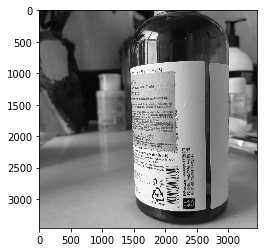

In [3]:
image = cv2.imread("03.jpg", 0)
image_out = cv2.imread("03.jpg")
plt.imshow(image, cmap='gray')

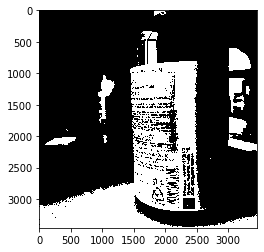

In [5]:
#thresholding
ret, thresh = cv2.threshold(image, 150, 255, cv2.THRESH_BINARY)
plt.imshow(thresh, cmap='gray')

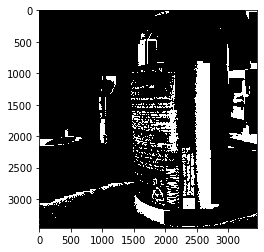

In [6]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (200,200))
#remove some noise
opening = cv2.morphologyEx(thresh, cv2.MORPH_BLACKHAT, kernel)
plt.imshow(opening, cmap='gray')

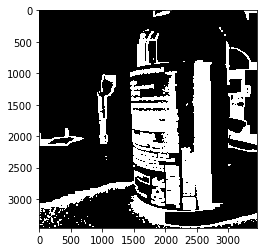

In [7]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (20, 20))
dilation = cv2.dilate(opening, kernel)
plt.imshow(dilation, cmap='gray')

In [8]:
# find the contours in the thresholded image
(cnts, _) = cv2.findContours(dilation.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# otherwise, sort the contours by area and compute the rotated
# bounding box of the largest contour
c = sorted(cnts, key = cv2.contourArea, reverse = True)[5]
rect = cv2.minAreaRect(c)
box = np.int0(cv2.boxPoints(rect))

In [9]:
cv2.drawContours(image_out, [box], -1, (0, 255, 0), 3)

array([[[ 14,  31,  28],
        [ 21,  38,  35],
        [ 32,  49,  46],
        ...,
        [145, 148, 153],
        [144, 147, 152],
        [145, 148, 153]],

       [[ 17,  34,  31],
        [ 21,  38,  35],
        [ 29,  46,  43],
        ...,
        [145, 148, 153],
        [145, 148, 153],
        [144, 147, 152]],

       [[ 24,  41,  38],
        [ 19,  36,  33],
        [ 24,  41,  38],
        ...,
        [146, 149, 154],
        [145, 148, 153],
        [145, 148, 153]],

       ...,

       [[169, 173, 174],
        [167, 171, 172],
        [167, 171, 172],
        ...,
        [175, 176, 174],
        [174, 175, 173],
        [171, 172, 170]],

       [[170, 174, 175],
        [169, 173, 174],
        [167, 171, 172],
        ...,
        [174, 175, 173],
        [174, 175, 173],
        [171, 172, 170]],

       [[169, 173, 174],
        [168, 172, 173],
        [167, 171, 172],
        ...,
        [173, 174, 172],
        [174, 175, 173],
        [175, 176, 174]]

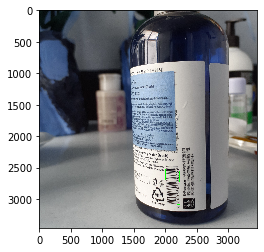

In [10]:
plt.imshow(image_out)


In [11]:
cv2.imwrite('out03.jpg', image_out)

True